In [1]:
"""
set of scripts to run while taking data for first look analysis
(run from main ground_cofe directory so paths work out right"""
import sys
sys.path.append('../')
sys.path.append('D:\software_git_repos\greenpol\telescope_control')
sys.path.append('D:\software_git_repos\greenpol\cofe-python-analysis-tools-master\utils_meinhold')
sys.path.append('D:\software_git_repos\greenpol\cofe-python-analysis-tools-master\utils_zonca')
sys.path.append('D:\\software_git_repos\\greenpol\\telescope_control\\VtoT')
#sys.path.append('telescope_control\VtoT')
from glob import glob
import os
import matplotlib.pyplot as plt
import cofe_util as cu
import demod
import h5py
import cPickle
import numpy as np
from numpy.lib import recfunctions as recf
from plot_path import *
from prm_util import nps
import time
import scipy.interpolate
import numpy.ma as ma
import realtime_gp as rt
import convert

In [2]:
fpath='D:/software_git_repos/greenpol/telescope_control/data_aquisition/'
yrmoday = '20180302'
hour1 = '12'
minute1 = '30'
hour2 = '12'
minute2 = '36'
chan = 'ch1'
var = 'T'
LOCATION = 'UCSB'

In [3]:
flp=rt.select_h5(fpath,yrmoday,hour1,minute1,hour2,minute2)
fld=rt.select_dat(fpath,yrmoday,hour1,minute1,hour2,minute2)[1]

In [4]:
pp = rt.get_h5_pointing(flp)
dd = rt.get_demodulated_data_from_list(fld)

D:\software_git_repos\cofe-python-analysis-tools\utils_zonca\demod\datparsing.py:39: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 255744 but corresponding boolean dimension is 255743
  good[duplicates] = False


1000
16
1000
16
1000
16
1000
16
1000
16
1000
16


In [5]:
combined = rt.combine_cofe_h5_pointing(dd, pp)

In [6]:
##select a staring-time and an ending-time, it returns dat files in between
def select_dat(fpath,yrmoday,st_hour,st_minute,ed_hour,ed_minute):
    
    #searching all dat files under selected path
    all_fname_demod = glob.glob(fpath+'/demod_data/'+yrmoday+'/*.h5')
    all_fname = glob.glob(fpath+'/data/'+yrmoday+'/*.dat')

    ftime=time_conv(st_hour,st_minute,ed_hour,ed_minute)  
      
    star=ftime[0]+ftime[1]
    end=ftime[2]+ftime[3]

    #search files between selected starting-time and ending-time
    sub_fname=[ i for i in all_fname
                if i[-12:][:4]>=star and i[-12:][:4]<=end]
    
    sub_fname_demod = []
    sub_fname_mod = []
    for f in range(len(sub_fname)):
        if os.stat(sub_fname[f]).st_size == 10752000:
            fname = sub_fname[f][:66] + 'demod_data/' + sub_fname[f][71:-4]+'.h5'
            if fname in all_fname_demod:
                sub_fname_demod.append(fname)
            else:
                sub_fname_mod.append(sub_fname[f])
    
    return sub_fname_demod, sub_fname_mod

In [7]:
def select_h5(fpath,yrmoday,st_hour,st_minute,ed_hour,ed_minute):

    #searching all hdf5 files under selected path
    all_fname=glob.glob(fpath+'/pointing_data/'+yrmoday[4:6]+'-'+yrmoday[6:8]+'-'+yrmoday[0:4]+'/*.h5')
   
    ftime=time_conv(st_hour,st_minute,ed_hour,ed_minute)
    
    star=ftime[0]+"-"+ftime[1]
    end=ftime[2]+"-"+ftime[3]

    sub_fname=[ i for i in all_fname
                if i[-11:][:5]>=star and i[-11:][:5]<=end]
    

    return sub_fname

In [8]:
fld_demod, fld = select_dat(fpath,yrmoday,hour1,minute1,hour2,minute2)

In [9]:
def get_demodulated_h5(filelist):
    demod_dd = []
    for f in fld_demod:
        h = h5py.File(f)
        demod_dd.append(h['demod_data'])

    demod_dd = np.concatenate(demod_dd)
    
    return demod_dd

In [10]:
def get_all_demodulated_data(fld_demod, fld):

    if len(fld_demod) != 0 and len(fld) != 0:
        demod_dd = get_demodulated_h5(fld_demod)
        dd = rt.get_demodulated_data_from_list(fld)
        
        return np.concatenate((demod_dd, dd), 0)
    
    elif len(fld_demod) != 0 and len(fld) == 0:
        demod_dd = get_demodulated_h5(fld_demod)
        
        return demod_dd
    
    elif len(fld_demod) == 0 and len(fld) != 0:
        dd = rt.get_demodulated_data_from_list(fld)
        
        return dd
    
    else:
        print 'need at least one array'
        

In [11]:
fld_demod, fld = select_dat(fpath,yrmoday,hour1,minute1,hour2,minute2)

In [12]:
dd=get_all_demodulated_data(fld_demod, fld)

1000
16
1000
16
1000
16
1000
16
1000
16
1000
16


In [13]:
#combined_demod = rt.combine_cofe_h5_pointing(demod_dd, pp)
combined = rt.combine_cofe_h5_pointing(dd, pp)

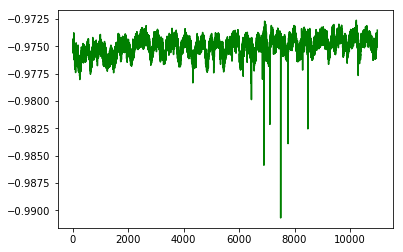

In [14]:
plt.plot(combined['sci_data'][chan][var], 'g-')
#plt.plot(combined_demod['sci_data'][chan][var], 'b-')
plt.show()